# Exploratory Data Analysis & Data Preprocessing for the Customer Complaint Dataset 

Importing Libraries

In [1]:
import sys
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/elbethelzewdie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from src.data_loader import load_data


Loading dataset

In [3]:
df = load_data('/Users/elbethelzewdie/Downloads/rag-complaint-chatbot/rag-complaint-chatbot/data/raw/complaints.csv')
df.info()

/Users/elbethelzewdie/Downloads/rag-complaint-chatbot/rag-complaint-chatbot/src/data_loader.py:20: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

In [4]:
# Display the first few rows of the dataframe
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


## Exploratory Data Analysis

#### Checking for missing values

In [5]:
# Check for missing values
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrative    6629041
Company public response         4770207
Company                               0
State                             54516
ZIP code                          30228
Tags                            8981029
Consumer consent provided?      1649561
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              8841498
Complaint ID                          0
dtype: int64

#### Distribution of Customer Complaints

##### Distribution of complaints across Products

In [6]:
product_counts = (
    df["Product"]
    .value_counts()
    .reset_index()
)

product_counts.columns = ["Product", "Count"]
product_counts

,Product,Count
0,Credit reporting or other personal consumer re...,4834855
1,"Credit reporting, credit repair services, or o...",2163857
2,Debt collection,799197
3,Mortgage,422254
4,Checking or savings account,291178
5,Credit card,226686
6,Credit card or prepaid card,206369
7,"Money transfer, virtual currency, or money ser...",145066
8,Credit reporting,140429
9,Student loan,109717


In [7]:
top_products = product_counts.head(10)

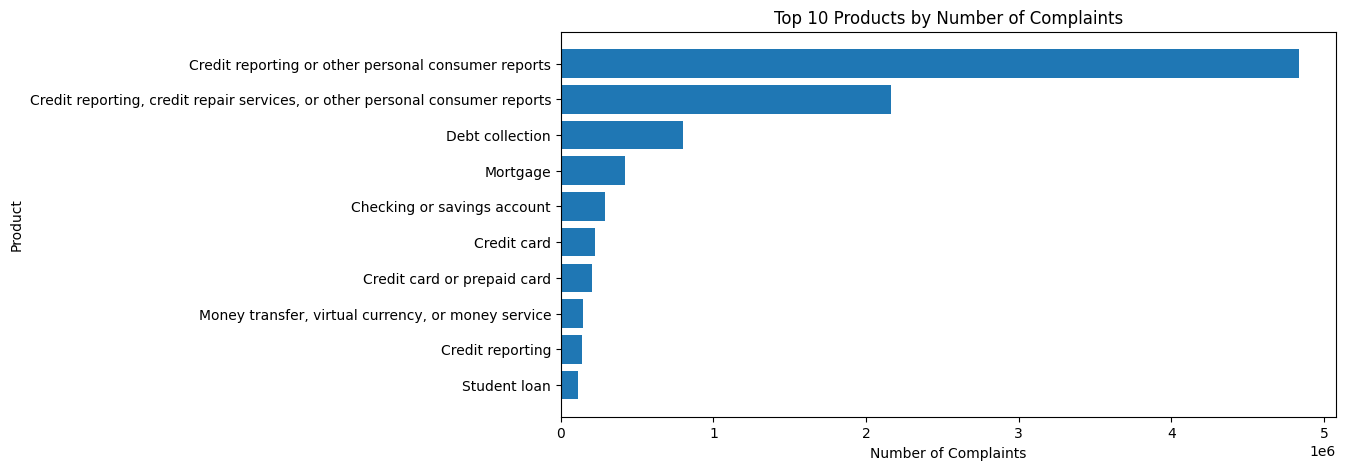

In [8]:
plt.figure(figsize=(10, 5))
plt.barh(top_products["Product"], top_products["Count"])
plt.gca().invert_yaxis()
plt.title("Top 10 Products by Number of Complaints")
plt.xlabel("Number of Complaints")
plt.ylabel("Product")
plt.show()

##### Distribution of complaints across Sub-products

In [9]:
sub_product_counts = (
    df["Sub-product"]
    .value_counts()
    .reset_index()
)

sub_product_counts.columns = ["Sub-product", "Count"]
sub_product_counts.to_csv("Sub-product_counts.csv", index=False)
sub_product_counts.head(10)

,Sub-product,Count
0,Credit reporting,6955847
1,Checking account,293297
2,General-purpose credit card or charge card,281931
3,I do not know,248891
4,Other debt,147439
5,Credit card debt,134074
6,Conventional home mortgage,118185
7,Other mortgage,86627
8,Domestic (US) money transfer,76302
9,Conventional fixed mortgage,70605


In [10]:
top_sub_products = sub_product_counts.head(10)

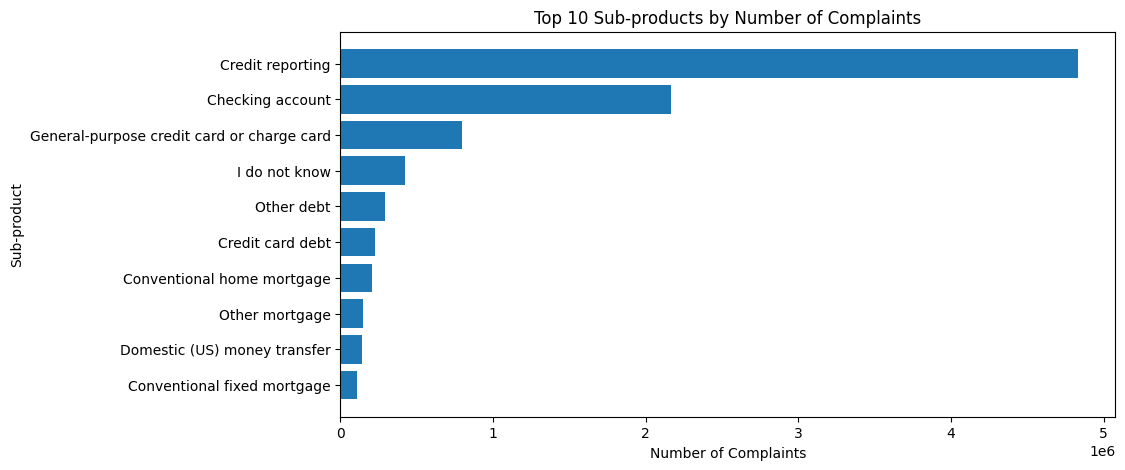

In [11]:
plt.figure(figsize=(10, 5))
plt.barh(top_sub_products["Sub-product"], top_products["Count"])
plt.gca().invert_yaxis()
plt.title("Top 10 Sub-products by Number of Complaints")
plt.xlabel("Number of Complaints")
plt.ylabel("Sub-product")
plt.show()

#### Length (word count) of Consumer complaint narrative

In [12]:
# Count words without creating intermediate lists
def count_words(text):
    if pd.isna(text):
        return 0
    return len(str(text).split())

# Apply with progress bar if needed
df["narrative_word_count"] = df["Consumer complaint narrative"].apply(count_words)

In [13]:
print(df["narrative_word_count"].describe())

count    9.609797e+06
mean     5.446667e+01
std      1.497672e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+01
max      6.469000e+03
Name: narrative_word_count, dtype: float64


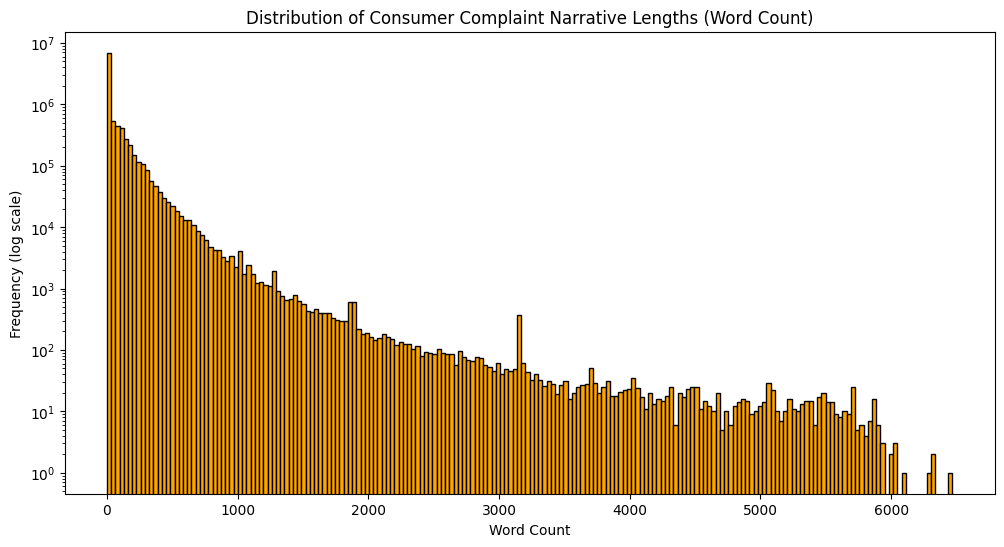

In [14]:
plt.figure(figsize=(12, 6))
plt.hist(df["narrative_word_count"], bins=200, color="orange", edgecolor="black")
plt.yscale("log")  # log scale because many short narratives and few long ones
plt.title("Distribution of Consumer Complaint Narrative Lengths (Word Count)")
plt.xlabel("Word Count")
plt.ylabel("Frequency (log scale)")
plt.show()

In [15]:
with_narrative = df["Consumer complaint narrative"].notna().sum()
without_narrative = df["Consumer complaint narrative"].isna().sum()

print(f"Complaints WITH narratives: {with_narrative}")
print(f"Complaints WITHOUT narratives: {without_narrative}")

Complaints WITH narratives: 2980756
Complaints WITHOUT narratives: 6629041


## Filter the dataset 

In [16]:
print("\n" + "="*80 + "\n")

# Define the products to include for each category
product_mapping = {
    "Credit card": [
        "Credit card",
        "Credit card or prepaid card",
        "Prepaid card"
    ],
    "Personal loan": [
        "Payday loan, title loan, or personal loan",
        "Payday loan, title loan, personal loan, or advanced deposit",
        "Consumer Loan",
        "Payday loan"
    ],
    "Savings account": [
        "Checking or savings account",
        "Bank account or service"
    ],
    "Money transfers": [
        "Money transfer, virtual currency, or money service",
        "Money transfers",
        "Virtual currency"
    ]
}

# Calculate counts for each original product
print("COMPLAINT COUNTS BY ORIGINAL PRODUCT:")
print("-" * 50)
total_filtered = 0

for category, products in product_mapping.items():
    print(f"\n{category.upper()}:")
    print("-" * 30)
    category_total = 0

    for product in products:
        # Check if product exists in dataset
        if product in df["Product"].values:
            count = (df["Product"] == product).sum()
            print(f"  {product}: {count:,} complaints")
            category_total += count
        else:
            print(f"  {product}: NOT FOUND in dataset")

    print(f"  {'→ Subtotal:':<45} {category_total:,} complaints")
    total_filtered += category_total

print("\n" + "="*80)
print(f"\nSUMMARY:")
print("-" * 30)
print(f"Original dataset size: {len(df):,} complaints")
print(f"Filtered dataset size: {total_filtered:,} complaints")
print(f"Percentage included: {(total_filtered/len(df))*100:.2f}%")

# Now create the filtered dataframe
all_required_products = []
for products in product_mapping.values():
    all_required_products.extend(products)

filtered_df = df[df["Product"].isin(all_required_products)].copy()

# Add a simplified product category column
def assign_category(product):
    for category, products in product_mapping.items():
        if product in products:
            return category
    return "Other"

filtered_df["Product_category"] = filtered_df["Product"].apply(assign_category)

# Show final distribution
print("\n" + "="*80)
print("FINAL DISTRIBUTION AFTER FILTERING:")
print("-" * 40)
category_counts = filtered_df["Product_category"].value_counts()
for category, count in category_counts.items():
    print(f"{category}: {count:,} complaints ({count/total_filtered*100:.1f}%)")

print(f"\nTotal in filtered dataset: {len(filtered_df):,} complaints")
print(f"DataFrame shape: {filtered_df.shape}")

# Quick sanity check
print("\n" + "="*80)
print("SANITY CHECK:")
print("-" * 20)
print(f"Rows in filtered_df match calculated total: {len(filtered_df) == total_filtered}")



COMPLAINT COUNTS BY ORIGINAL PRODUCT:
--------------------------------------------------

CREDIT CARD:
------------------------------
  Credit card: 226,686 complaints
  Credit card or prepaid card: 206,369 complaints
  Prepaid card: 15,280 complaints
  → Subtotal:                                   448,335 complaints

PERSONAL LOAN:
------------------------------
  Payday loan, title loan, or personal loan: 30,641 complaints
  Payday loan, title loan, personal loan, or advanced deposit: NOT FOUND in dataset
  Consumer Loan: 31,574 complaints
  Payday loan: 5,541 complaints
  → Subtotal:                                   67,756 complaints

SAVINGS ACCOUNT:
------------------------------
  Checking or savings account: 291,178 complaints
  Bank account or service: 86,205 complaints
  → Subtotal:                                   377,383 complaints

MONEY TRANSFERS:
------------------------------
  Money transfer, virtual currency, or money service: 145,066 complaints
  Money transfers: 

In [17]:
filtered_df.shape

(1043912, 20)

In [18]:
print(filtered_df.columns.tolist())

['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID', 'narrative_word_count', 'Product_category']


In [19]:
TEXT_COL = "Consumer complaint narrative"

In [20]:
total_rows = len(filtered_df)

missing_narratives = filtered_df[TEXT_COL].isna().sum()
empty_narratives = (filtered_df[TEXT_COL].fillna("").str.strip() == "").sum()
valid_narratives = total_rows - empty_narratives

print("=" * 70)
print("NARRATIVE QUALITY CHECK (BEFORE CLEANING)")
print("-" * 70)
print(f"Total complaints:            {total_rows:,}")
print(f"Missing narratives (NaN):    {missing_narratives:,}")
print(f"Empty narratives (blank):    {empty_narratives:,}")
print(f"Complaints with narratives:  {valid_narratives:,}")
print(f"Percentage with narratives:  {(valid_narratives / total_rows) * 100:.2f}%")


NARRATIVE QUALITY CHECK (BEFORE CLEANING)
----------------------------------------------------------------------
Total complaints:            1,043,912
Missing narratives (NaN):    564,436
Empty narratives (blank):    564,436
Complaints with narratives:  479,476
Percentage with narratives:  45.93%


In [21]:
clean_df = filtered_df[
    filtered_df[TEXT_COL].fillna("").str.strip() != ""
].copy()

In [22]:
print("\n" + "=" * 70)
print("AFTER REMOVING EMPTY NARRATIVES")
print("-" * 70)
print(f"Remaining complaints:        {len(clean_df):,}")
print(f"Removed complaints:          {total_rows - len(clean_df):,}")
print(f"Percentage retained:         {(len(clean_df) / total_rows) * 100:.2f}%")



AFTER REMOVING EMPTY NARRATIVES
----------------------------------------------------------------------
Remaining complaints:        479,476
Removed complaints:          564,436
Percentage retained:         45.93%


In [23]:
clean_df.shape

(479476, 20)

#### Lowercasing a Text

In [24]:
print("=" * 70)
print("TEXT NORMALIZATION: LOWERCASE (BEFORE)")
print("-" * 70)
print(clean_df[TEXT_COL].head(3))

TEXT NORMALIZATION: LOWERCASE (BEFORE)
----------------------------------------------------------------------
12237    A XXXX XXXX card was opened under my name by a...
12532    I made the mistake of using my wellsfargo debi...
13280    Dear CFPB, I have a secured credit card with c...
Name: Consumer complaint narrative, dtype: object


In [25]:
clean_df[TEXT_COL] = clean_df[TEXT_COL].str.lower()

In [26]:
print("\n" + "=" * 70)
print("TEXT NORMALIZATION: LOWERCASE (AFTER)")
print("-" * 70)
print(clean_df[TEXT_COL].head(3))


TEXT NORMALIZATION: LOWERCASE (AFTER)
----------------------------------------------------------------------
12237    a xxxx xxxx card was opened under my name by a...
12532    i made the mistake of using my wellsfargo debi...
13280    dear cfpb, i have a secured credit card with c...
Name: Consumer complaint narrative, dtype: object


### Text Cleaning

In [27]:
def clean_text(text):
    """
    Clean a text string by:
    - Converting to string (safety)
    - Removing emails
    - Removing phone numbers
    - Removing special characters except spaces
    """
    if pd.isna(text):
        return ""

    text = str(text)

    # Remove emails
    text = re.sub(r"\S+@\S+\.\S+", "", text)

    # Remove phone numbers (formats like 123-456-7890, (123) 456-7890, 1234567890)
    text = re.sub(r"(\+?\d{1,2}\s?)?(\(?\d{3}\)?[\s.-]?)?\d{3}[\s.-]?\d{4}", "", text)

    # Remove special characters (keep letters, numbers, spaces)
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)

    # Collapse multiple spaces into one
    text = re.sub(r"\s+", " ", text).strip()

    return text


In [28]:
clean_df["Consumer complaint narrative"] = clean_df["Consumer complaint narrative"].apply(clean_text)

#### Removing Boilerplate texts

In [29]:
boilerplate_sentences = [
    "i am writing to file a complaint",
    "i am submitting this complaint regarding",
    "this is a complaint about",
    "i would like to file a complaint",
    "i am contacting you regarding",
    "i am writing to submit a complaint",
    "i am filing a complaint about",
    "i am reaching out to file a complaint",
    "i am writing in regards to a complaint",
    "i would like to report a complaint",
    "i am writing to express my complaint",
    "i am contacting you to file a complaint",
    "this complaint concerns",
    "i am filing this complaint regarding",
    "i wish to file a complaint",
    "i am submitting a complaint regarding",
    "i would like to submit a complaint",
]


In [30]:
def remove_boilerplate_sentences(text):
    """
    Remove common boilerplate opening sentences from complaint narratives.
    """
    if pd.isna(text):
        return ""

    for sentence in boilerplate_sentences:
        # Remove the sentence anywhere in the text, case-insensitive
        text = re.sub(re.escape(sentence), "", text, flags=re.IGNORECASE)

    # Collapse multiple spaces into one
    text = re.sub(r"\s+", " ", text).strip()

    return text

# Apply to dataframe
clean_df["Consumer complaint narrative"] = clean_df["Consumer complaint narrative"].apply(remove_boilerplate_sentences)


#### Remove extra whitespace

In [31]:
clean_df["Consumer complaint narrative"] = clean_df["Consumer complaint narrative"].str.strip().str.replace(r"\s+", " ", regex=True)

#### Remove stopwords

In [32]:
# Custom stopwords list (negations removed)
stop_words = [
    "i","me","my","myself","we","our","ours","ourselves","you","your","yours",
    "yourself","yourselves","he","him","his","himself","she","her","hers","herself",
    "it","its","itself","they","them","their","theirs","themselves","what","which",
    "who","whom","this","that","these","those","am","is","are","was","were","be",
    "been","being","have","has","had","having","do","does","did","doing","a","an",
    "the","and","but","if","or","because","as","until","while","of","at","by","for",
    "with","about","against","between","into","through","during","before","after",
    "above","below","to","from","up","down","in","out","on","off","over","under",
    "again","further","then","once","here","there","when","where","why","how","all",
    "any","both","each","few","more","most","other","some","such","only","own",
    "same","so","than","too","very","s","t","can","will","just","now"
]


In [33]:
def remove_custom_stopwords(text, stop_words):
    """
    Remove stopwords from a text string.
    """
    if pd.isna(text):
        return ""

    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)


In [34]:
clean_df["Consumer complaint narrative"] = clean_df["Consumer complaint narrative"].apply(
    lambda x: remove_custom_stopwords(x, stop_words)
)

In [35]:
print(clean_df["Consumer complaint narrative"].head(5))

12237    xxxx xxxx card opened name fraudster received ...
12532    made mistake using wellsfargo debit card depsi...
13280    dear cfpb secured credit card citibank changed...
13506    citi rewards cards credit balance issued 8400 ...
13955    b writing dispute following charges citi credi...
Name: Consumer complaint narrative, dtype: object


#### Lemmatization

In [36]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

clean_df["Consumer complaint narrative"] = clean_df["Consumer complaint narrative"].apply(lemmatize_text)


#### Removing Placeholders

In [37]:
placeholders = ["xxxx", "xxxxx", "xxxxxx", "---", "n/a", "na", "unknown"]

In [38]:
# Create a regex pattern for all placeholders
pattern = "|".join([re.escape(p) for p in placeholders])

# Filter rows containing placeholders (case-insensitive)
placeholder_rows = clean_df[clean_df["Consumer complaint narrative"].str.contains(pattern, case=False, na=False)]

print(f"Number of complaints containing placeholders: {len(placeholder_rows):,}")


Number of complaints containing placeholders: 427,542


In [39]:
# Show first 10 rows with placeholders
print(placeholder_rows["Consumer complaint narrative"].head(10))

12237    xxxx xxxx card opened name fraudster received ...
12532    made mistake using wellsfargo debit card depsi...
13280    dear cfpb secured credit card citibank changed...
13506    citi reward card credit balance issued 8400 00...
13955    b writing dispute following charge citi credit...
14249    although account deemed closed continued make ...
14562    got locked account trying link bank account xx...
15740    received email xxxx xxxx xxxx xxxx saying late...
16636    filed dispute bank truist business credit card...
17030    process applying mortgage recent overdraft fee...
Name: Consumer complaint narrative, dtype: object


In [40]:
def remove_placeholders(text):
    """
    Remove common placeholders from complaint narratives.
    """
    if pd.isna(text):
        return ""

    for ph in placeholders:
        text = text.replace(ph, "")

    # Collapse multiple spaces
    text = re.sub(r"\s+", " ", text).strip()

    return text


In [41]:
clean_df["Consumer complaint narrative"] = clean_df["Consumer complaint narrative"].apply(remove_placeholders)

In [42]:
before = len(clean_df)
clean_df = clean_df[clean_df["Consumer complaint narrative"].str.strip() != ""].copy()
after = len(clean_df)

print(f"Removed {before - after:,} complaints that were only placeholders")
print(f"Remaining complaints: {after:,}")


Removed 3 complaints that were only placeholders
Remaining complaints: 479,473


#### Final count of complaints per product category

In [43]:
# Count the number of complaints in each product category
category_counts = clean_df["Product_category"].value_counts()

print("Number of complaints per product category:\n")
print(category_counts)

Number of complaints per product category:

Product_category
Credit card        197126
Savings account    155202
Money transfers     98700
Personal loan       28445
Name: count, dtype: int64


#### Save the Cleaned Dateset

In [44]:
# Save cleaned data to CSV
cleaned_file_path = "/Users/elbethelzewdie/Downloads/rag-complaint-chatbot/rag-complaint-chatbot/data/preprocessed/filtered_complaints.csv"
clean_df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")



Cleaned dataset saved to: /Users/elbethelzewdie/Downloads/rag-complaint-chatbot/rag-complaint-chatbot/data/preprocessed/filtered_complaints.csv


## Exploratory Data Analysis and Cleaning Summary

The dataset contains over 9.6 million records with 18 columns, most of which are of type object. Several columns have a significant number of missing values, with the top three being:

- Tags: 8,981,029 missing

- Consumer disputed?: 8,841,498 missing

- Consumer complaint narrative: 6,629,041 missing

Examining the product distribution, the top three products by complaint count are:

- Credit reporting or other personal consumer issues: 4,834,855 complaints

- Credit reporting, credit repair services: 2,163,857 complaints

- Debt collection: 799,197 complaints

The length of complaint narratives varies widely, ranging from 0 to 6,469 words, with a mean of 54 words. Out of approximately 9.6 million complaints, 2,980,756 contain a narrative, while 6,629,041 do not.

For analysis purposes, products were grouped into four high-level categories:

- Credit card

- Personal loan

- Savings account

- Money transfers

The counts of complaints in each category before removing empty narratives were:

| Product Category  | Complaint Count |
|------------------|----------------|
| Credit card       | 448,335        |
| Personal loan     | 67,756         |
| Savings account   | 377,383        |
| Money transfers   | 150,438        |


After removing complaints with empty narratives, the counts became:

| Product Category  | Complaint Count |
|------------------|----------------|
| Credit card       | 197,125        |
| Savings account   | 155,202        |
| Money transfers   | 98,698         |
| Personal loan     | 28,445         |


This highlights a significant class imbalance, with Credit card complaints being almost seven times more numerous than Personal loan complaints.

## Text Cleaning and Normalization

To prepare the narratives for NLP and RAG pipelines, several text cleaning steps were applied:

Removal of phone numbers, emails, special characters, and symbols, which are not essential for understanding complaint content

- Lowercasing of all text

- Lemmatization to normalize word forms

- Stopword removal using a customized stopword list.

NLTK’s default stopwords were modified to retain negation words (e.g., “not”, “no”, “nor”), which are important for correctly interpreting complaints

## Final Dataset

After cleaning, the final dataset contains 479,473 complaints across 20 columns, ready for downstream processing such as embedding generation and retrieval for a RAG-based chatbot.